# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['DESCR', 'target', 'feature_names', 'data'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
 print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

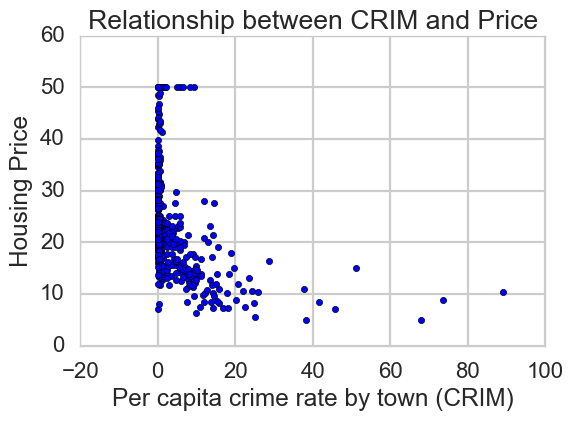

In [13]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

###### your turn: describe relationship

###### It is a positive non-linear realtionship.  The outliers seem to be in the lower price range. The concentration also is in the lower price and lower per capita crime rate.


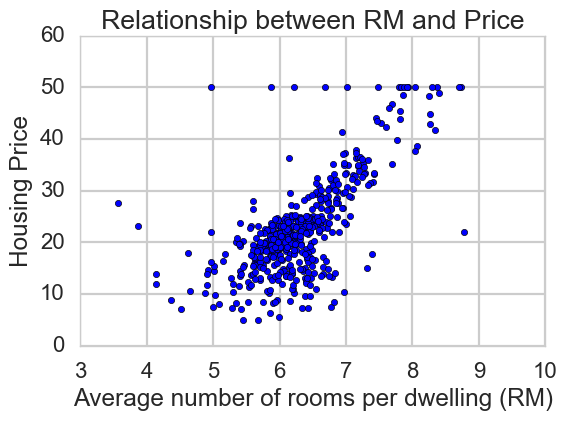

In [14]:
# your turn: scatter plot between *RM* and *PRICE*

plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


###### The above seems to be a linear positive relationship between RM and PRICE, since more rooms in the house means that the prices can be set at a higher rate. There are outliers present in the lower left half of the plot and the higher price range.

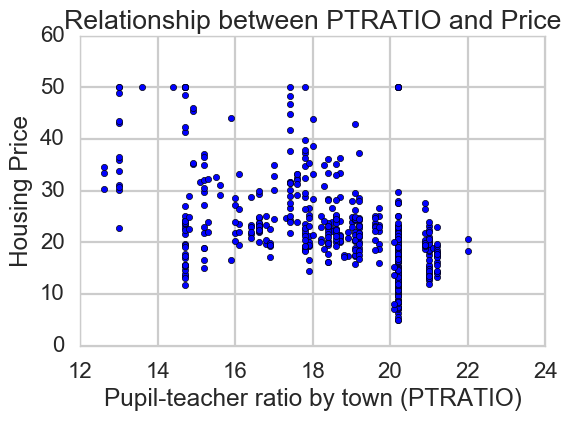

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

###### The above seems to be a non-linear relationship with outliers in the higher Housing Price range.  The concentration is in the higher pupil-teacher ratio  and lower housing price meaning they get the best of both worlds.
###### The interesting fact to note is that it looks like there are certain pockets of PTRATIO lower or higher where higher prices are being demanded for the houses.

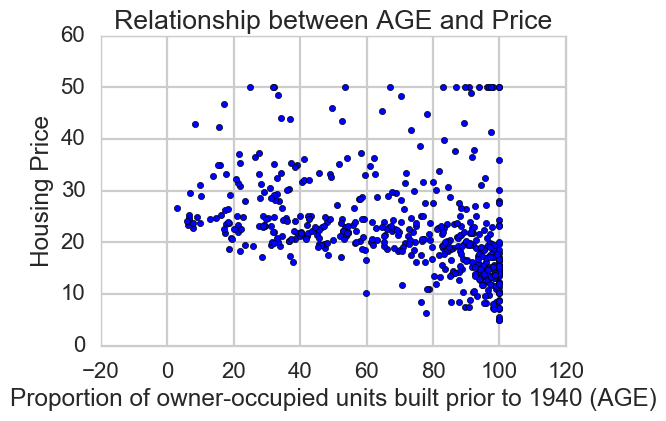

In [16]:
# your turn: create some other scatter plots

plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

###### The relationship between AGE and PRICE shows that as the AGE proportion of the housing unit increasing the PRICE is decreasing due to decrease in value of the property making logical sense.  This is a linear negative relationship.

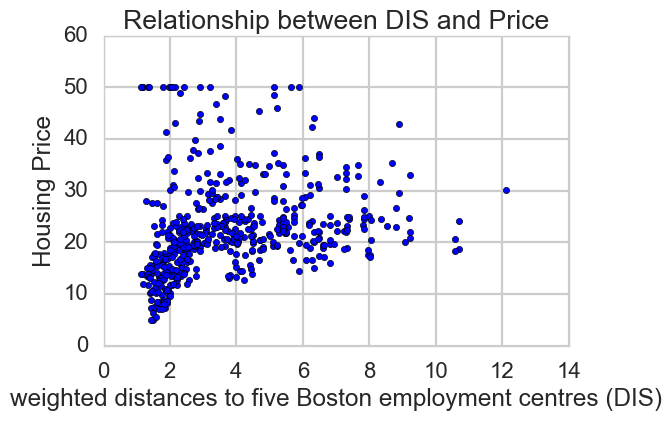

In [17]:
# your turn: create some other scatter plots
# DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

###### The curve shows that the lower ditances have a lower price but as the DIS increases the PRICE does not follow a pattern but for the most of the sample population there seems to be a slower rise in the PRICE with increase in DIS, which again would make logical sense.

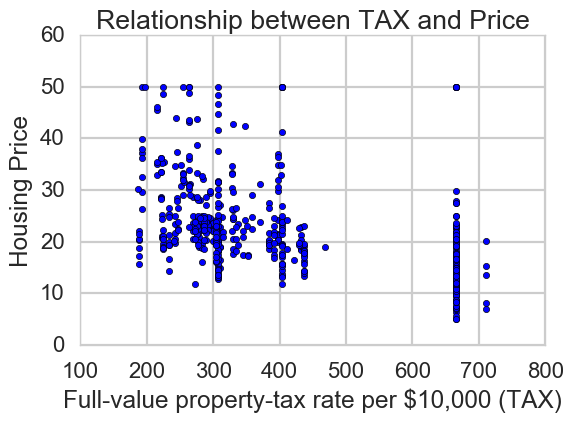

In [18]:

plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Full-value property-tax rate per $10,000 (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

###### The TAX and PRICE have a similar plot as the PTRATIO and PRICE where certain pockets of TAX have a low to high PRICE ranges. But the majority of the sample population is towards the low TAX and lower PRICE.

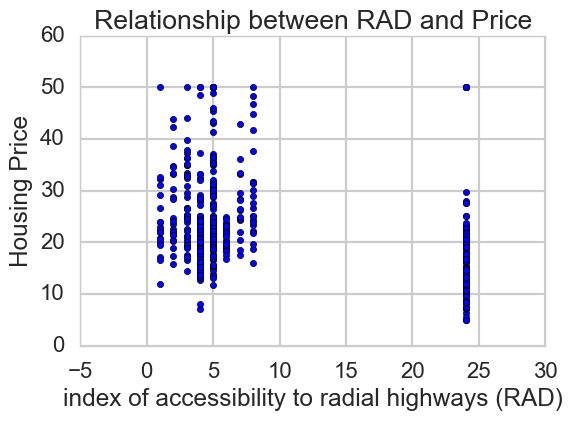

In [19]:

plt.scatter(bos.RAD, bos.PRICE)
plt.xlabel("index of accessibility to radial highways (RAD)")
plt.ylabel("Housing Price")
plt.title("Relationship between RAD and Price")

###### THE RAD vs PRICE plot shows that certain RAD indexes can demand low to higher range of PRICES, these probably coincide with the highways and where they lead to in term of favorite accessible locations that are sought after by the housing market.

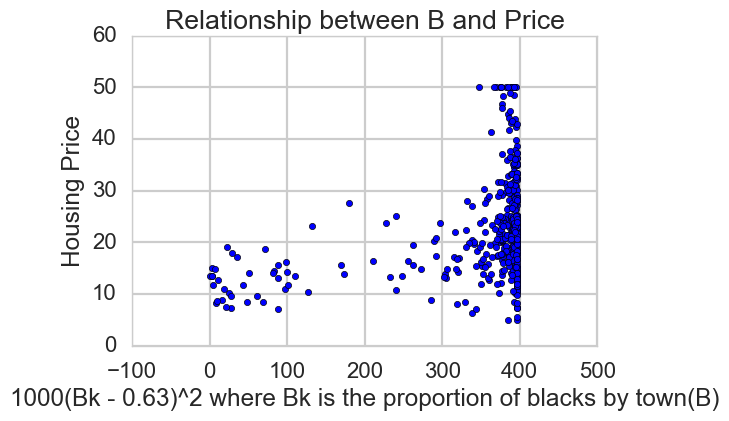

In [20]:

plt.scatter(bos.B, bos.PRICE)
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town(B)")
plt.ylabel("Housing Price")
plt.title("Relationship between B and Price")

In [21]:
# Calculating the Bk value to understand metric better
bos['Bk'] = [(((blackpop/ 1000)**0.5) + 0.63) for blackpop in bos['B']]
# bos

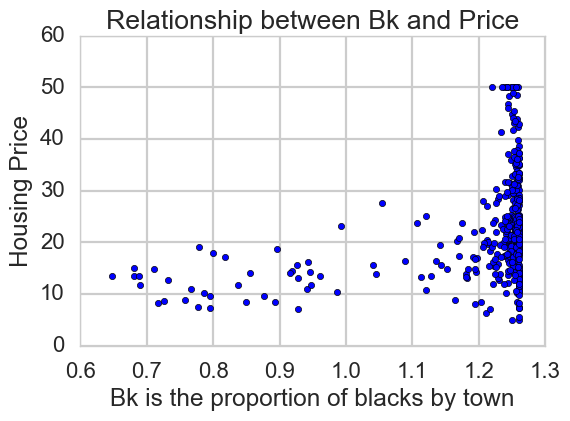

In [22]:
plt.scatter(bos.Bk, bos.PRICE)
plt.xlabel("Bk is the proportion of blacks by town")
plt.ylabel("Housing Price")
plt.title("Relationship between Bk and Price")

###### The Bk vs PRICE graph shows there is a distinct difference in lower than 1.0 Bk and PRICE values since the prices are lower with mixed population but as the value of Bk goes above 1.0 there is a concentration at about 1.25 where housing is priced anywhere from LOW to HIGH.

The above observation is made dependent of the data provided and there could be some influencing factors that are hidden and unknown at the present time.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

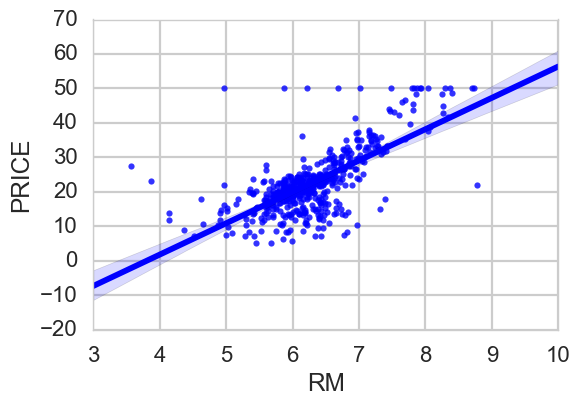

In [23]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


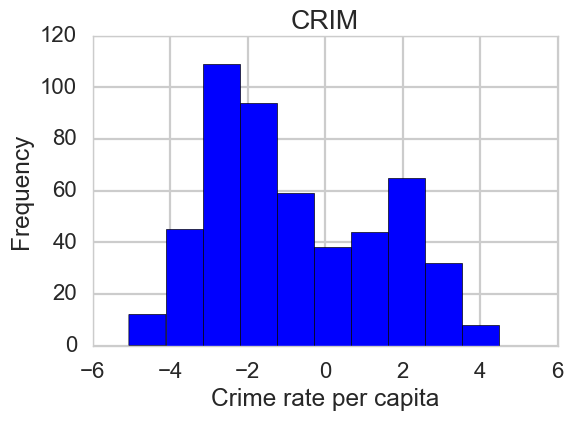

In [24]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

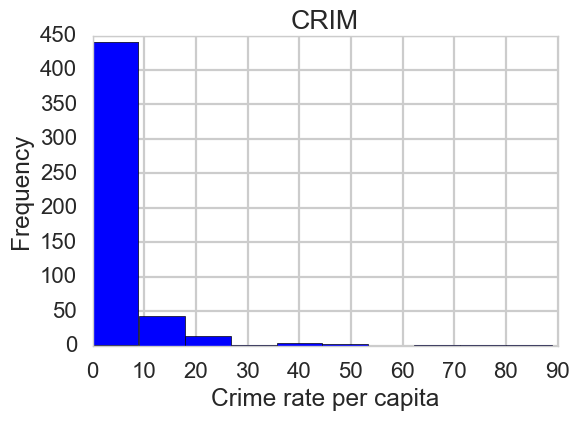

In [25]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

###### Exercise: What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?
###### The purpose of taking the log is transformation of the CRIM data in order to remove the highly clustered data in the 0-10 CRIM rate range.  The data is skewed and this transformation helps to remove this skewness.  The data shows a more normal distribution after the transformation which is not apparent without the transformation.

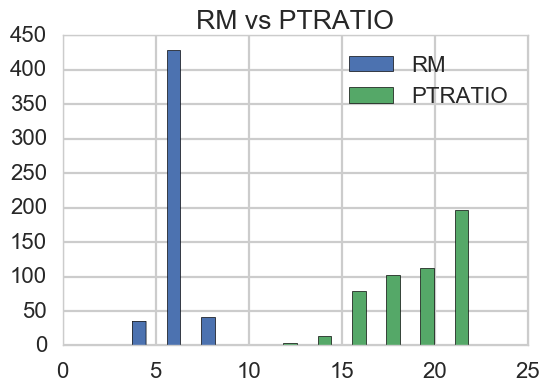

In [29]:
plt.style.use('seaborn-deep')

x = bos.RM 
y = bos.PTRATIO  
bins = np.linspace(0,10,20, 30)

plt.hist([x, y],label= ['RM', 'PTRATIO'])
plt.legend(loc='upper right')
plt.title("RM vs PTRATIO")
plt.show()

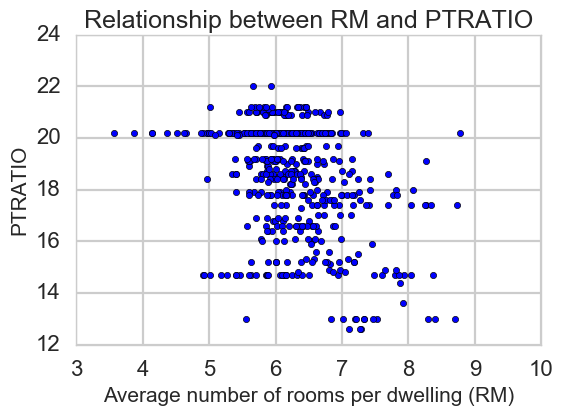

In [296]:
plt.scatter(bos.RM, bos.PTRATIO)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("PTRATIO")
plt.title("Relationship between RM and PTRATIO")

###### The maximum sample population is at the highest PTRATIO, showing that the Bostonians prefer having more teachers and maybe willing to pay a higher housing PRICE for sucha perk.  The correlation between Rooms and PTRATIO is that the most rooms in houses i.e. 6 is also prefered, showing that the population that likes the higher pTRATIO also prefers greater number of rooms in their houses.

######  The above is an assumption but for the most part RM and PTRATIO are variables that are independent of each other.

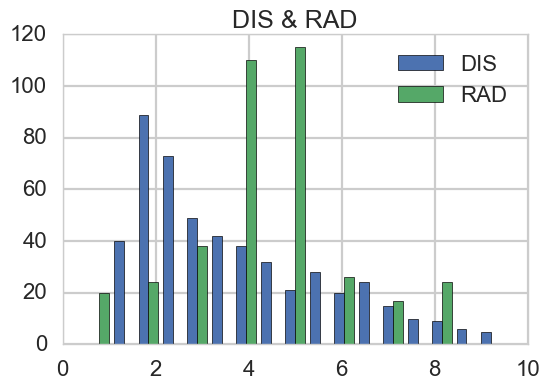

In [213]:
plt.style.use('seaborn-deep')

x = bos.DIS
y = bos.RAD
bins = np.linspace(0,10, 20)

plt.hist([x, y], bins,label=['DIS','RAD'])
plt.legend(loc='upper right')
plt.title("DIS & RAD")
plt.show()

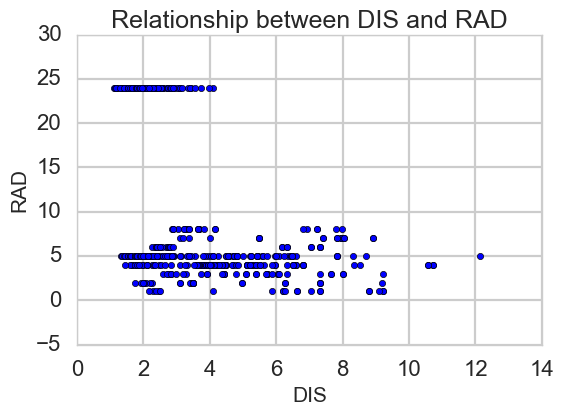

In [297]:
plt.scatter(bos.DIS, bos.RAD)
plt.xlabel("DIS")
plt.ylabel("RAD")
plt.title("Relationship between DIS and RAD")

###### The above relationship between DIS (distances to the 5 employment centres) and RAD the index of accessibility to the radial highways shows that the DIS plot in blue follows a right-tail distribution whereas the RAD plot in green is mostly a normal distribution. The DIS and RAD maybe related in the sense that most of the housing market had reasonable accesibility to the emplyment centers due to the accessibility to the radial highways and reducing the commute time to maybe cause these2 factors to be a reason for higher housing prices.

######  The above is an assumption but for the most part DIS and RAD are variables that are independent of each other.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [31]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 25 May 2018   Prob (F-statistic):           2.49e-74
Time:                        14:35:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

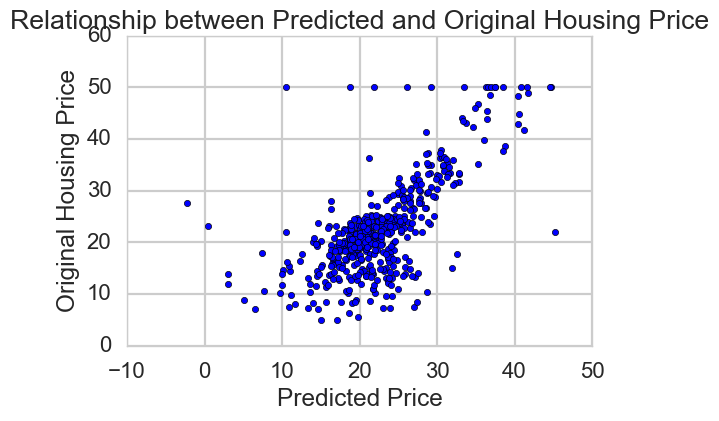

In [33]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted and Original Housing Price")

###### The plot proves that there is a linear relationship between predicted and original housing prices, but the wierdness is in the fact that there are some outliers that are negative or near-zero predicted prices.  There is also a ceiling in the original housing prices at 50 which could be for a reason which is unknown at this time.  Additionally there are some outliers in the 40+ range of the predicted prices.

### Fitting Linear Regression using `sklearn`


In [34]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predict()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [50]:
# Look inside lm object
print(lm.score(X,bos.PRICE))

0.742133242421166


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [35]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


###### Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? 

Changing the model will be as follows to not fit an intercept term: m = ols('PRICE ~ RM -1',bos).fit()

Dropping the intercept in a linear regression model makes the predictor’s coefficient stronger and more significant.  Dropping the intercept in a regression model forces the regression line to go through the origin–the y intercept must be 0. The problem with dropping the intercept is if the slope is steeper just because you’re forcing the line through the origin, not because it fits the data better.  If the intercept really should be something else, you’re creating that steepness artificially.  A more significant model isn’t better if it’s inaccurate.

The constant term is in part estimated by the omission of predictors from a regression analysis. In essence, it serves as a garbage bin for any bias that is not accounted for by the terms in the model. You can picture this by imagining that the regression line floats up and down (by adjusting the constant) to a point where the mean of the residuals is zero, which is a key assumption for residual analysis. This floating is not based on what makes sense for the constant, but rather what works mathematically to produce that zero mean.

The constant guarantees that the residuals don’t have an overall positive or negative bias, but also makes it harder to interpret the value of the constant because it absorbs the bias.

So overall the recommendation would be to not drop the constant.

###### Exercise:One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

As seen above that the RM and PTRATIO and the DIS and RAD as histogram plots show that that for the most part all (X) independent variables are indenpendent of each other and they are normally distributed.

A more technical definition of an IID statistics is that random variables X1, X2, . . . , Xn are IID if they share the same probability distribution and are independent events. Sharing the same probability distribution means that if you plotted all of the variables together, they would resemble some kind of distribution: a uniform distribution, a normal distribution or any one of the dozens of other distributions.

Each distribution has it’s own characteristics. Let’s say we are looking at a sample of n random variables,
X1, X2,…, Xn. Since they are IID, each variable Xi has the same mean (μ), and variance(σ)2. In equation form, that’s:
E(Xi) = μ ; Var(Xi) = σ2
for all i = 1, 2,…, n.
Random variables that are identically distributed don’t necessarily have to have the same probability. A flipped coin can be modeled by a binomial distribution and generally has a 50% chance of a heads (or tails). But let’s say the coin was weighted so that the probability of a heads was 49.5% and tails was 50.5%. Although the coin flips are IID, they do not have equal probabilities.
The errors should also be randomly distributed. 

###### <p><b>Exercise:</b>True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>

###### Linearity. The dependent variable  Y  is a linear combination of the regression coefficients and the independent variables  X. This can be verified with a scatterplot of each  X  vs.  Y  and plotting correlations among  X . Nonlinearity can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model may be warranted.
###### Constant standard deviation. The SD of the dependent variable Y  should be constant for different values of X. We can check this by plotting each  X  against  Y  and verifying that there is no "funnel" shape showing data points fanning out as  X  increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), robust standard errors, or variance stabilizing transformations.
###### Normal distribution for errors. The  ϵ  term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
ϵi∼N(0,σ2)
  
 
Sometimes the distributions of responses  Y  may not be normally distributed at any given value of  X . e.g. skewed positively or negatively.
Independent errors. The observations are assumed to be obtained independently.
e.g. Observations across time may be correlated

Constant variance (a.k.a. homoscedasticity). This means that different values of the response variable have the same variance in their errors, regardless of the values of the predictor variables. In practice this assumption is invalid (i.e. the errors are heteroscedastic) if the response variable can vary over a wide scale. In order to check for heterogeneous error variance, or when a pattern of residuals violates model assumptions of homoscedasticity (error is equally variable around the 'best-fitting line' for all points of x), it is prudent to look for a "fanning effect" between residual error and predicted values. This is to say there will be a systematic change in the absolute or squared residuals when plotted against the predictive variables. Errors will not be evenly distributed across the regression line. Heteroscedasticity will result in the averaging over of distinguishable variances around the points to get a single variance that is inaccurately representing all the variances of the line. In effect, residuals appear clustered and spread apart on their predicted plots for larger and smaller values for points along the linear regression line, and the mean squared error for the model will be wrong. Typically, for example, a response variable whose mean is large will have a greater variance than one whose mean is small. For example, a given person whose income is predicted to be $100,000 may easily have an actual income of $80,000 or $120,000 (a standard deviation of around $20,000), while another person with a predicted income of $10,000 is unlikely to have the same $20,000 standard deviation, which would imply their actual income would vary anywhere between -$10,000 and $30,000. (In fact, as this shows, in many cases—often the same cases where the assumption of normally distributed errors fails—the variance or standard deviation should be predicted to be proportional to the mean, rather than constant.) Simple linear regression estimation methods give less precise parameter estimates and misleading inferential quantities such as standard errors when substantial heteroscedasticity is present. However, various estimation techniques (e.g. weighted least squares and heteroscedasticity-consistent standard errors) can handle heteroscedasticity in a quite general way. Bayesian linear regression techniques can also be used when the variance is assumed to be a function of the mean. It is also possible in some cases to fix the problem by applying a transformation to the response variable (e.g. fit the logarithm of the response variable using a linear regression model, which implies that the response variable has a log-normal distribution rather than a normal distribution).

So the answer is neither True nor False that Y has to be normally distributed, but this fact depends on the provided dataset.  Either normal distribution is present by default or can be worked around with transformation to account for the Y not being normally distributed.

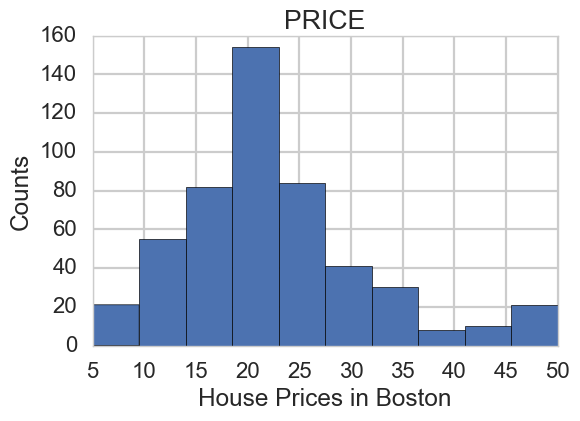

In [36]:
plt.hist(bos.PRICE)
plt.title("PRICE")
plt.xlabel("House Prices in Boston")
plt.ylabel("Counts")
plt.show()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [37]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 20.385342801332964


In [38]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 14


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.102529
1,ZN,0.046284
2,INDUS,0.016813
3,CHAS,2.686478
4,NOX,-18.298150
5,RM,3.844758
6,AGE,0.000457
7,DIS,-1.482789
8,RAD,0.309446
9,TAX,-0.012529


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [40]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.86932047, 24.94172823, 30.56643362, 28.62867176, 27.94097653])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

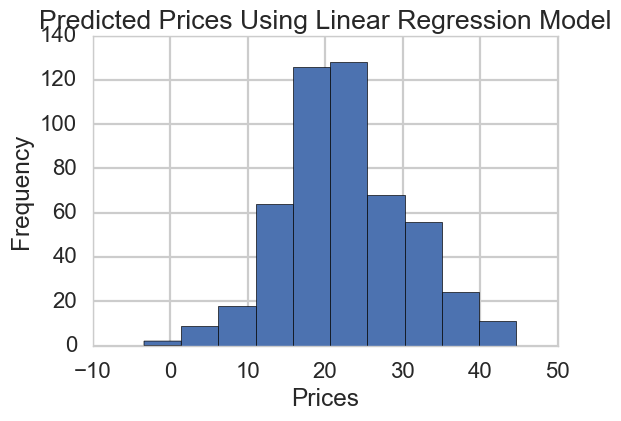

In [42]:
# your turn

plt.hist(lm.predict(X))
plt.title("Predicted Prices Using Linear Regression Model")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.show()

###### Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

The distribution of the predicted prices is normal with the shape being normal distribution/bell shaped, the center is around 20-22 range and the spread is from -4 to 45.
The outliers seem to be towards the lower range when the price is at or below zero, this could be because of some bias that the data is skewed.  We can drop these prices that are the negative range to give us more meaningful results.

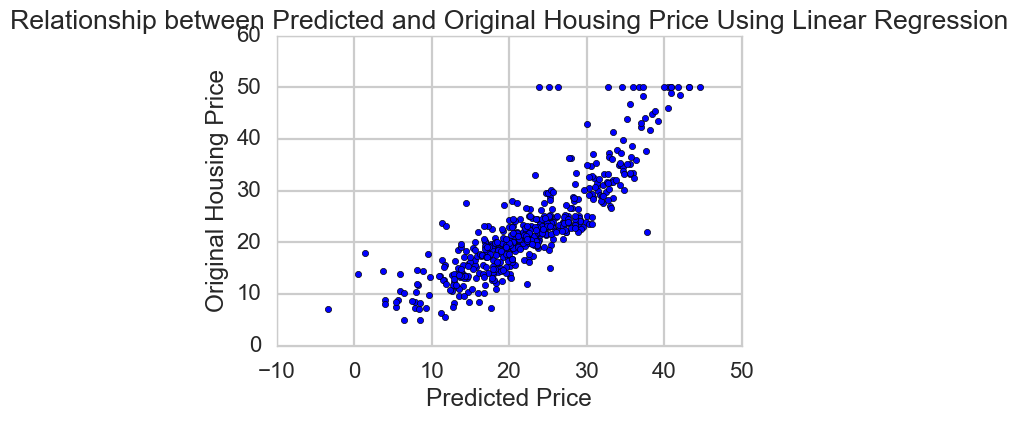

In [45]:
#Exercise:Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before)

plt.scatter(lm.predict(X), bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted and Original Housing Price Using Linear Regression")

###### Exercise: We have looked at fitting a linear model in both statsmodels and scikit-learn. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does statsmodels provide?

Scikit-learn’s other popular topics are machine-learning and data-science; StatsModels are econometrics, generalized-linear-models, timeseries-analysis, and regression-models. These topic tags reflect the conventional wisdom that scikit-learn is for machine learning and StatsModels is for complex statistics.

Scikit-learn offers a lot of simple, easy to learn algorithms that pretty much only require your data to be organized in the right way before you can run whatever classification, regression, or clustering algorithm you need. The pipelines provided in the system even make the process of transforming your data easier. Of course, choosing a Random Forest or a Ridge still might require understanding the difference between the two models, but scikit-learn has a variety of tools to help you pick the correct models and variables. With a little bit of work, a novice data scientist could have a set of predictions in minutes. 

Though StatsModels doesn’t have this variety of options, it offers statistics and econometric tools that are top of the line and validated against other statistics software like Stata and R. When you need a variety of linear regression models, mixed linear models, regression with discrete dependent variables, and more – StatsModels has options. It also has a syntax much closer to R so, for those who are transitioning to Python, StatsModels is a good choice. As expected for something coming from the statistics world, there’s an emphasis on understanding the relevant variables and effect size, compared to just finding the model with the best fit.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [43]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11015.112594450768


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [44]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

6.153448275570257e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

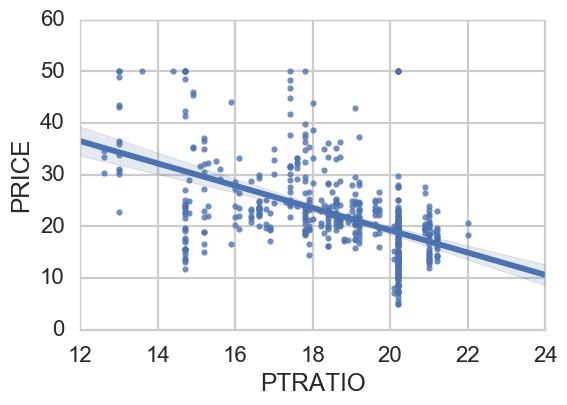

In [51]:
# your turn
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)

In [64]:
# from sklearn.linear_model import LinearRegression
# X_PTRATIO = X_PTRATIO.reshape(-1,1)
X_PTRATIO = bos.PTRATIO

In [65]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
m_ptratio = lm.fit(X_PTRATIO.reshape(-1,1), bos.PRICE)

In [69]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 62.34462747483266


In [70]:
print('Estimated coefficient: {}'.format(lm.coef_))

Estimated coefficient: [-2.1571753]


In [71]:
lm.score(X_PTRATIO.reshape(-1,1), bos.PRICE)

0.257847318009223

In [74]:
RSS = np.sum((bos.PRICE - lm.predict(X_PTRATIO.reshape(-1,1))) ** 2)
RSS

31702.01320696725

In [76]:
ESS = np.sum((lm.predict(X_PTRATIO.reshape(-1,1)) - np.mean(bos.PRICE)) ** 2)
ESS

11014.282208052513

In [77]:
Rsq = ESS/(ESS + RSS)
Rsq

0.25784731800922295

###### Exercise: Calculate (or extract) the  $R^2$  value. What does it tell you?

###### The $R^2$ value is aprroximately near 0.258, this value expains the variance of the data in the model, if it is closer to 1 it is considered better.  Here we can say that the variance cannot be totally explained by the model, so the model would benefit from being improved with a better $R^2$ score.

In [82]:
# F=MSR/MSE=(Rsq/ 1-Rsq)(N-K-1/K)
#since K=1
F = Rsq/(1-Rsq)* 506
F

175.80040614107517

###### Exercise: Compute the  F -statistic. What does it tell you?
###### The F-statistic is better when it is higher giving lower p-values.  Here since the F-statistics is near 176 in value it is considerbly high causing us to show that the model has a reasonably good fit for the data although the variance cannot be fully explained.

###### Exercise: Take a close look at the  F -statistic and the  t -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.

The partial F-statistic on a single variable is equal to the square of the t-statistic on its regression coefficient. Significance tests on either will yield identical p-values.

The F-statistic is more generally applicable (you don’t need to limit yourself to testing one parameter at a time like you do with the t-statistic) but less easily interpretable—while the t-test simply asks how many standard errors away from the null your test statistic is, the F-test is something along the lines of “on average, how much did R2 increase per variable when I added these variables, and was this more than I would expect due to chance if these variables had no effect at all on the outcome variable?”

As seen below the t-statistic for PTRATIO is -13.233 and that squared = 175.1 which is equal to the F-statistic value.  This is only true for a simple linear regression problem i.e. one variable.

In [303]:
m_before = ols('PRICE ~ PTRATIO',data=bos).fit()
print(m_before.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           1.61e-34
Time:                        14:04:54   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

###### CRIM, RM and PTRATIO

In [249]:
# from sklearn.linear_model import LinearRegression
# X_PTRATIO = X_PTRATIO.reshape(-1,1)
X_combined = pd.DataFrame()
X_combined['CRIM'] = bos.CRIM
X_combined['RM'] = bos.RM
X_combined['PTRATIO'] = bos.PTRATIO
# X_combined['PRICE'] = bos.PRICE
# X_combined

In [104]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
reduced_fitted = lm.fit(X_combined, bos.PRICE)

In [106]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -3.3066171324064975


In [107]:
print('Estimated coefficient: {}'.format(lm.coef_))

Estimated coefficient: [-0.20210971  7.3815667  -1.0741868 ]


In [109]:
lm.score(X_combined, bos.PRICE)

0.5934141551136979

In [112]:
RSS = np.sum((bos.PRICE - lm.predict(X_combined)) ** 2)
RSS

17367.84106172869

In [113]:
ESS = np.sum((lm.predict(X_combined) - np.mean(bos.PRICE)) ** 2)
ESS

25348.454353291032

In [114]:
Rsq = ESS/(ESS + RSS)
Rsq

0.5934141551136974

In [254]:
# F=MSR/MSE=(Rsq/ 1-Rsq)(N-K-1/K)
#since K=1
F = (Rsq/(1-Rsq))* ((506-3-1)/3)
F

245.77335803035777

###### Exercise: Compute or extract the  F-statistic. What does it tell you about the model?

The F-statistic is more generally applicable (you don’t need to limit yourself to testing one parameter at a time like you do with the t-statistic) but less easily interpretable—while the t-test simply asks how many standard errors away from the null your test statistic is, the F-test is something along the lines of “on average, how much did R2 increase per variable when I added these variables, and was this more than I would expect due to chance if these variables had no effect at all on the outcome variable?”
Here we chose 3 variables CRIM, RM and PTRATIO. The variance is explained by this statistic, the value of F-statistic = 245.78 tells me that the variables are statistically significant more so than just PTRATIO.  So this is in an improvement to the model. 

###### Exercise: Compute or extract the $R^2$ statistic. What does it tell you about the model?
The $R^2$ value is 0.59 which is higher than 0.258 with just PTRATIO, This is partly also because the $R^2$ value will always increase with the addition of a greater number of variables. So we look at the adjusted $R^2$ value which accounts for the increased number of variables.  Here again is an improvement to the model and telling us that the 3 variables are statistically significant in establishing the predicted value of Y i.e. PRICE. 

###### Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

The estimated co-efficients are :
[-0.20210971  7.3815667  -1.0741868 ] for CRIM, RM and PTRATIO respectively.
so Y = beta -0.202x1 + 7.382x2 -1.074x3 + error  this is the final equation.
  -0.202 * mean(CRIM) = -0.202 * 3.59 = -0.725
  7.382 * mean(RM) = 7.382 * 6.28 = 46.359
  -1.074 * mean(PTRATIO) = -1.074 * 18.46 = -19.826
  
  So the most to least influential variable in descending order of significance is : RM, PTRATIO and CRIM.
  
  It can be explained that the RMs decide whether they can live comfortably to justify the higher prices, having a good school system i.e. higher PTRATIO and lastly the CRIM rate is the last factor to justify the higher prices.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [246]:
X_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
CRIM       506 non-null float64
RM         506 non-null float64
PTRATIO    506 non-null float64
PRICE      506 non-null float64
dtypes: float64(4)
memory usage: 15.9 KB


In [305]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m_before = ols('PRICE ~ CRIM+RM+PTRATIO',data=bos).fit()
print(m_before.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 01 Jun 2018   Prob (F-statistic):           1.09e-97
Time:                        17:10:38   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

###### CRIM, RM and PTRATIO + RAD

In [143]:
# from sklearn.linear_model import LinearRegression
# X_PTRATIO = X_PTRATIO.reshape(-1,1)
# X_combined = pd.DataFrame()
# X_combined['CRIM'] = bos.CRIM
# X_combined['RM'] = bos.RM
# X_combined['PTRATIO'] = bos.PTRATIO
X_new_combined = X_combined.copy()
X_new_combined['RAD'] = bos.RAD
# X_new_combined

In [119]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
lm.fit(X_new_combined, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -4.310884638147105


In [122]:
print('Estimated coefficient: {}'.format(lm.coef_))

Estimated coefficient: [-0.17122971  7.39628833 -1.00130878 -0.05699102]


In [123]:
lm.score(X_new_combined, bos.PRICE)

0.5949391844006309

In [124]:
RSS = np.sum((bos.PRICE - lm.predict(X_new_combined)) ** 2)
RSS

17302.697460191484

In [125]:
ESS = np.sum((lm.predict(X_new_combined) - np.mean(bos.PRICE)) ** 2)
ESS

25413.597954828307

In [126]:
Rsq = ESS/(ESS + RSS)
Rsq

0.5949391844006314

In [253]:
# F=MSR/MSE=(Rsq/ 1-Rsq)(N-K-1/K)
#since K=3
F = (Rsq/(1-Rsq))* ((506-4-1)/4)
F

183.9628272508106

In [147]:
# X_combined

In [148]:
# X_new_combined

In [131]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [250]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
# m_after = sm.OLS(bos.PRICE,X_new_combined).fit()
m_after = ols('PRICE ~ CRIM+RM+PTRATIO+RAD',data=bos).fit()

print(m_after.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 31 May 2018   Prob (F-statistic):           7.24e-97
Time:                        07:17:57   Log-Likelihood:                -1611.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     501   BIC:                             3254.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3109      4.100     -1.051      0.2

###### Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the  FF -test comparing the two models as well as the AIC. Which model is better?

I added the RAD variable, The F-statictic probability is below 0.05 and shows that the variables are statictically significant and contrbute to the predicted value although it shows that adding RAD causes the p-value to go even lower showing a good sign.  The AIC value is is the same therefore not showing a remarked improvement in the model before and after the addition of the extra variable.
The p-value of RAD is 0.170 which is greater than 0.05 therefore showing that it is not statistically signicant.  The other sign of a bad variable is that RAD 95% CI(confidence interval) is between -0.139 and 0.025 which incudes zero and that indicates a bad fit.  Furthermore, the 95% confidence interval for RAD includes a value of 0. In linear regression, it means no association with response variable.

Overall the model is better without the RAD variable.



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [306]:

# fitted values (need a constant term for intercept)
model_fitted_y = m_before.fittedvalues

# model residuals
model_residuals = m_before.resid

# normalized residuals
model_norm_residuals = m_before.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = m_before.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = m_before.get_influence().cooks_distance[0]

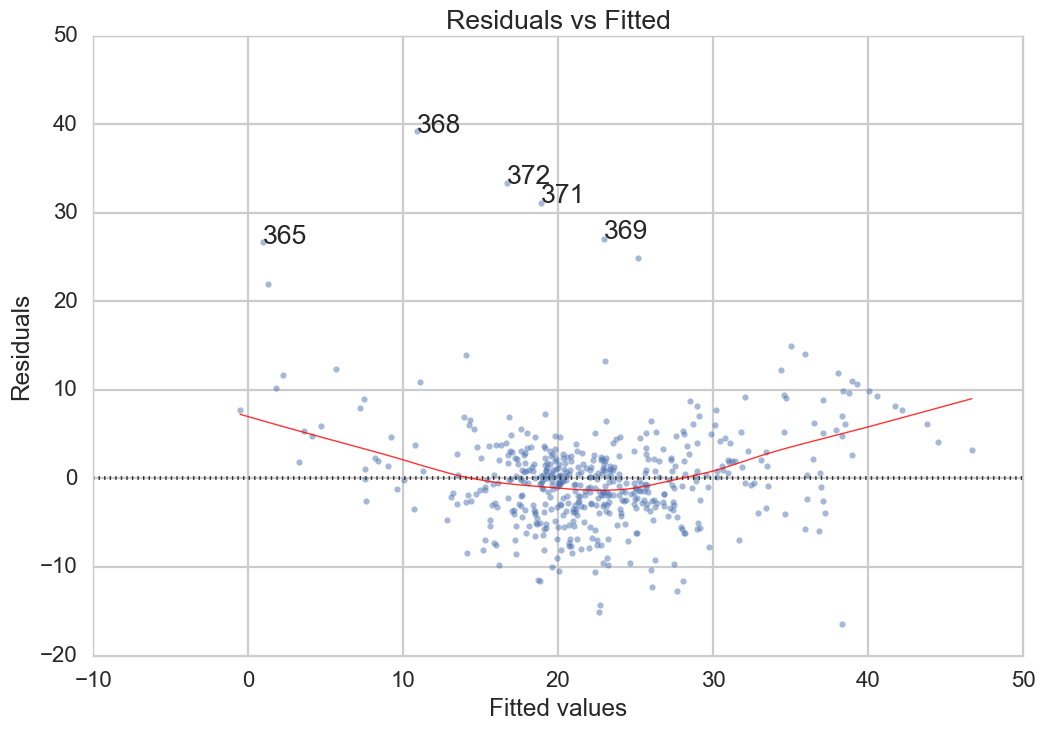

In [200]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, bos.PRICE, X_combined, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_5 = abs_resid[:5]

for i in abs_resid_top_5.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

###### Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

The plot tells us that the fitted and the residual values are randomly scattered which follows the assumptions of linear regression model.  The residuals have a non-linear parabolic pattern where the non-linear pattern is not explained by the model and was left out in the residuals.  The residuals are also equally distributed around the mean zero value, telling us that there is an equal variance around the mean.  There are points namely the indexes 365, 368, 369, 371, 372 can be considered as outliers that need to be addressed. 

There seems to be a violation of the model assumptions in which the predicted value should be linearly associated with the independent variables. i.e. Y is linear function of X.

In [201]:
# # Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?
# plt.plot(bos.PRICE,m_before.fittedvalues, 'bo')
# plt.plot(bos.PRICE,m_before.resid, 'ro')
# plt.legend(['Fitted model','Residuals'], loc=2)
# plt.ylim(-20, 50)
# plt.xlim(5, 60)
# plt.xlabel('PRICE')
# plt.ylabel('Model CRIM, RM, PTRATIO combined values')
# plt.title('Linear Model: Smaller Feature Set')

In [202]:
# Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?
# plt.plot(m_before.fittedvalues,m_before.resid,'ro')
# plot(m_before)
# plt.plot(bos.PRICE,m_before.resid, 'ro')
# plt.legend(['Fitted model','Residuals'], loc=2)
# plt.ylim(-20, 50)
# plt.xlim(5, 60)
# plt.xlabel('PRICE')
# plt.ylabel('Model CRIM, RM, PTRATIO combined values')
# plt.title('Linear Model: Smaller Feature Set')

In [204]:
from statsmodels.graphics.gofplots import ProbPlot

# plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

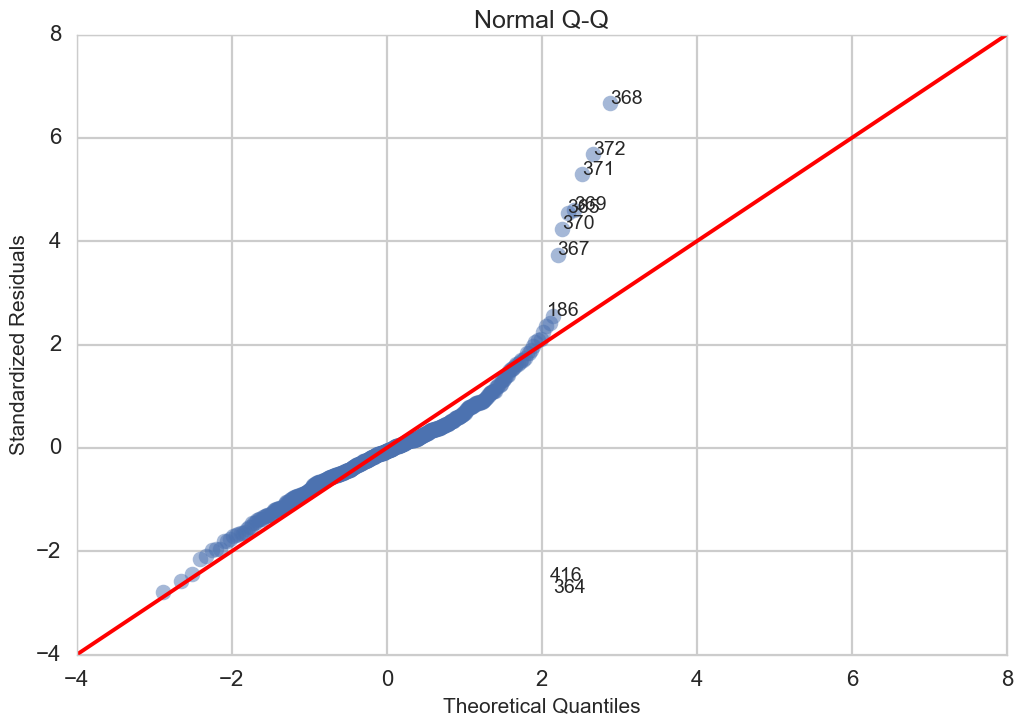

In [292]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_10 = abs_norm_resid[:10]

for r, i in enumerate(abs_norm_resid_top_10):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

###### Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
The plot indicates that for the most part the residuals are normally distributed since they followthe straight line, but they deviate towards the end i.e. values such as indexes 367,370,365,369,371,372,368,364,416 are potential problem points.

###### Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

The fitted vs residual gives us know-how of whether residuals have non-linear patterns, the quantile plot shows whether the residuals were normally distributed, both of which lead us to telling whether the fitted model is good or otherwise.  Another advantage is that both plots indicate outliers in the data.  
The disadvantage is that they tell us nothing about the actual data points especially the outliers to distinguish them from high leverage points.   

###### Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

The outliers identified are indexes 367,370,365,369,371,372,368,364,416. These indexes have PRICE values mostly ranging from 21 -50 i.e. 3* 9.19 (STD for PRICE).  This means that their prices are atleast 3 standard deviations away from the mean. Which proves their significance as outliers in the model. 

In [209]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
# sm.qqplot(m_before.resid, line='45')

In [ ]:
# Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

In [ ]:
# Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

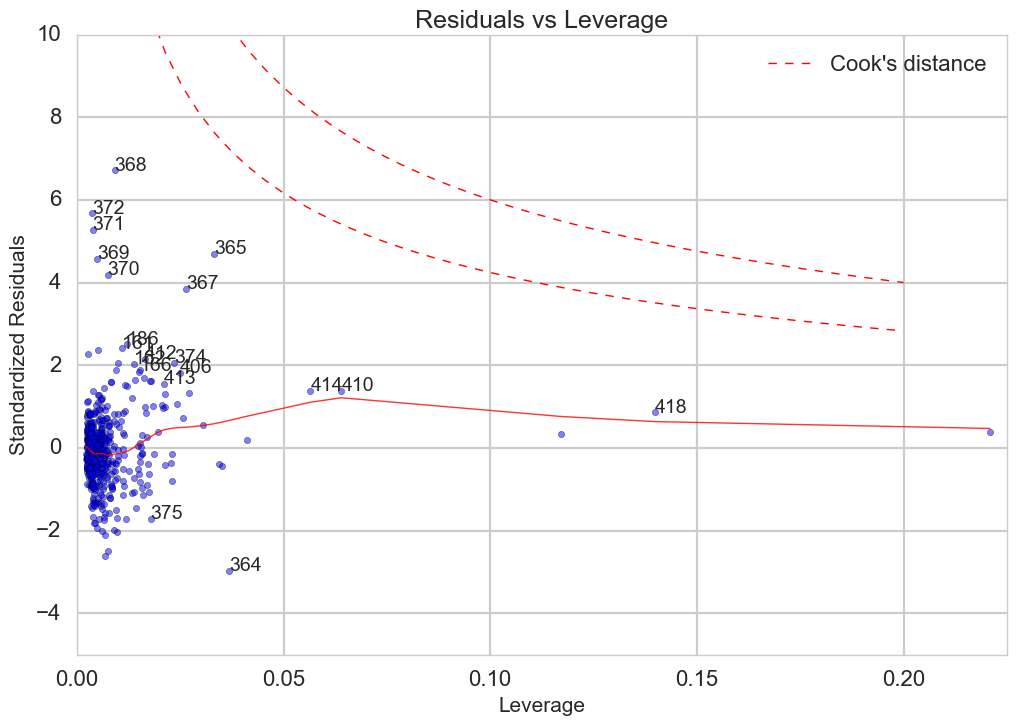

In [307]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.225)
plot_lm_4.axes[0].set_ylim(-5, 10)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_20 = np.flip(np.argsort(model_cooks), 0)[:20]

for i in leverage_top_20:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(m_before.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

###### Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

Although outside the Cook's distance, the high leverage points are index values 410,414 and 418.  These high leverage points can be explained when looking at the PRICE values of 15,7 and 8.8.  These values are towards the lower end of the pricing and could be affected by the higher CRIM rates of 51,45,73 which are closer to the max value of CRIM = 88.

In [308]:
bos.loc[[410,414,418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Bk
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0,0.680990
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0,0.927103
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,0.758258


In [218]:
# from statsmodels.graphics.regressionplots import *
# plot_leverage_resid2(m_before)
# influence_plot(m_before)

In [293]:
# X_combined.loc[365:]
bos.loc[[186,364,365,366,367,368,369,371,372,400,416,418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Bk
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,1.256602
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,1.225441
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,1.225567
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9,1.192165
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.992519
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,1.242797
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,1.242642
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,1.235103
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,1.219814
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6,1.260000


In [287]:
bos.loc[bos.PRICE==5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Bk
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0,1.26000
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,1.25046


In [238]:
bos.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [294]:
new_dropped_data = bos.copy()
new_dropped_data=new_dropped_data.drop([186,364,365,366,367,368,369,371,372,400,416,418], axis=0)
# new_dropped_data

In [295]:
m_dropped = ols('PRICE ~ CRIM+RM+PTRATIO',data=new_dropped_data).fit()
print(m_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 31 May 2018   Prob (F-statistic):          1.71e-136
Time:                        12:02:17   Log-Likelihood:                -1457.0
No. Observations:                 494   AIC:                             2922.
Df Residuals:                     490   BIC:                             2939.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0914      3.310     -3.049      0.0

In [277]:

# fitted values (need a constant term for intercept)
model_fitted_y_new = m_dropped.fittedvalues

# model residuals
model_residuals_new = m_dropped.resid

# normalized residuals
model_norm_residuals_new = m_dropped.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt_new = np.sqrt(np.abs(model_norm_residuals_new))

# absolute residuals
model_abs_resid_new = np.abs(model_residuals_new)

# leverage, from statsmodels internals
model_leverage_new = m_dropped.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks_new = m_dropped.get_influence().cooks_distance[0]

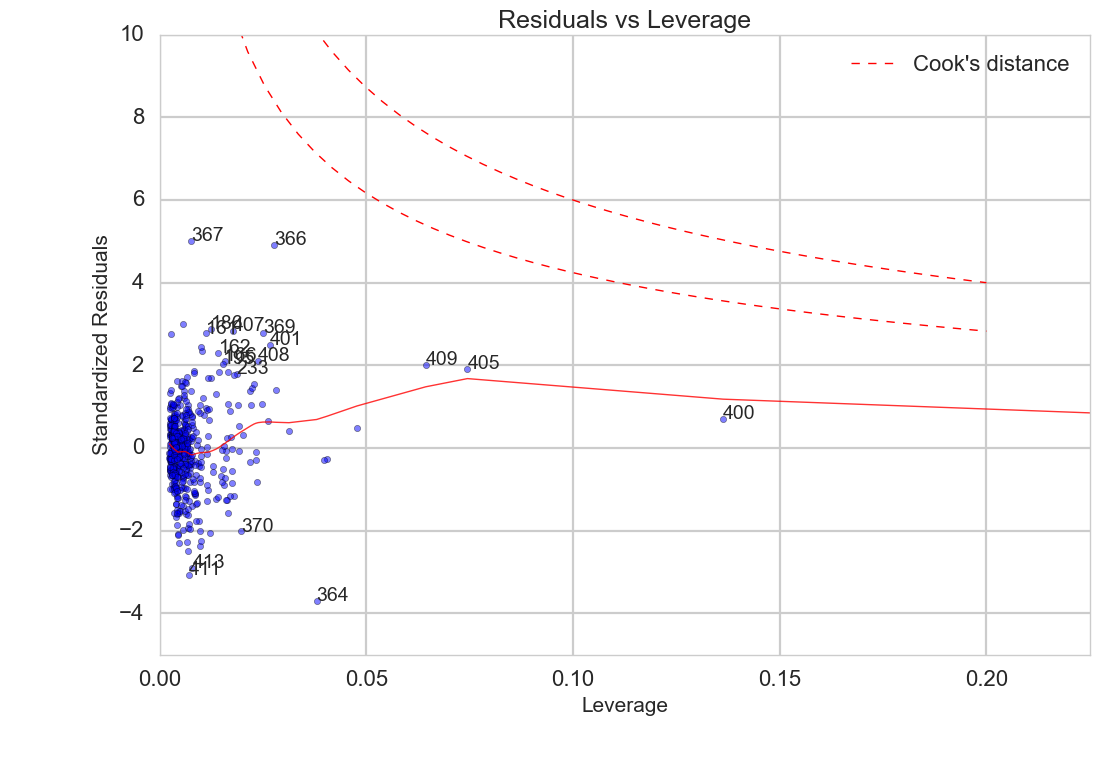

In [278]:
# Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage_new, model_norm_residuals_new, alpha=0.5)
sns.regplot(model_leverage_new, model_norm_residuals_new, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.225)
plot_lm_4.axes[0].set_ylim(-5, 10)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_20 = np.flip(np.argsort(model_cooks_new), 0)[:20]

for i in leverage_top_20:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage_new[i], 
                                   model_norm_residuals_new[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(m_dropped.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

###### Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

Once the outliers and high leverage points were removed indexes 186,364,365,366,367,368,369,371,372,400,416,418 we see that all values have significantly improved from:

Rsq: 0.593 to 0.724 (closer to 1 better)
AIC: 3233 to 2922 (lower values are better)
Coeff: CRIM, RM, PTRATIO: [-0.2021, 7.3816, -1.0742] to [-0.2053, 8.3969, -1.0707] which are all improvements to their significance to the entire model.
